In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


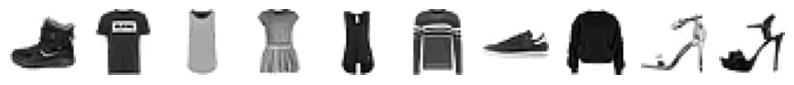

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for  i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate

In [11]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [12]:
print(scores['test_score'])

[0.82908333 0.81941667 0.82075    0.80916667 0.818     ]


In [13]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)

In [14]:
print(np.mean(scores['test_score']))

0.8313833333333334


In [15]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,))

In [19]:
model = keras.Sequential(dense)

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6099 - accuracy: 0.7916
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8418
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4499 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4365 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4290 - accuracy: 0.8555


In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.8504


[0.4409995377063751, 0.8504166603088379]

In [24]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [25]:
model = keras.Sequential([dense1, dense2])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = '패션 MNIST 모델')

In [28]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape = (784,)))
model.add( keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5678 - accuracy: 0.8081
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4094 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3774 - accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3540 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3376 - accuracy: 0.8779


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8724


[0.3498569428920746, 0.8724166750907898]

In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

In [39]:
train_scaled.shape

(60000, 28, 28)

In [41]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5401 - accuracy: 0.8108
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3917 - accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3522 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3303 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3166 - accuracy: 0.8857


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3900 - accuracy: 0.8661


[0.38997653126716614, 0.8660833239555359]

In [44]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [45]:
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [46]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2862 - accuracy: 0.8958
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.8997
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2648 - accuracy: 0.9032
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9047
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9079


In [47]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8875


[0.3244556486606598, 0.887499988079071]

In [48]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [49]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2374 - accuracy: 0.9127
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2317 - accuracy: 0.9147
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2281 - accuracy: 0.9152
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2231 - accuracy: 0.9166
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9192


In [50]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8877


[0.334733784198761, 0.887666642665863]

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [52]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2438 - accuracy: 0.9093
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2324 - accuracy: 0.9138
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2289 - accuracy: 0.9144
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2205 - accuracy: 0.9171
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2142 - accuracy: 0.9204


In [53]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8892


[0.3300034999847412, 0.8892499804496765]

In [54]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [55]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [56]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


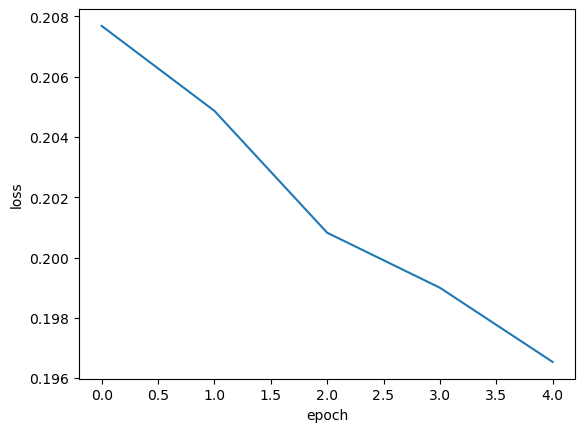

In [57]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [58]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [59]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [60]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


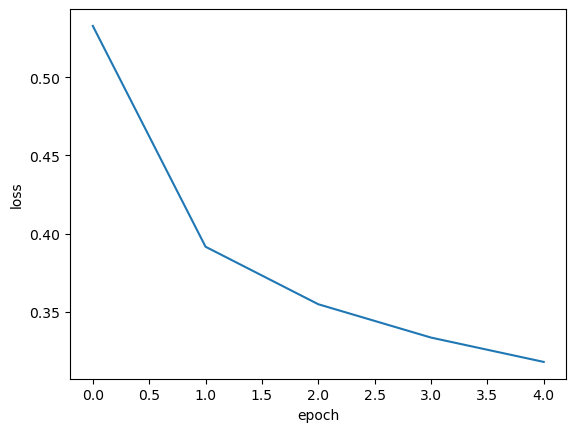

In [62]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

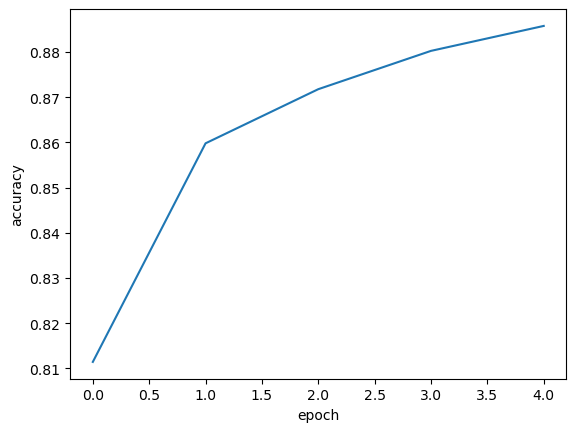

In [63]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [64]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

In [65]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


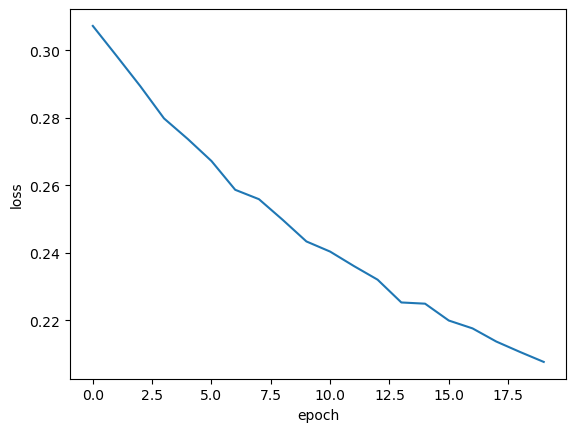

In [66]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [67]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [68]:
model = model_fn()

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
